<a href="https://colab.research.google.com/github/BNarayanaReddy/Torch-Essentials/blob/main/TorchEssentials_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import numpy as np

In [2]:
x = np.random.randn(10, 2)
y = np.random.randint(0,2, size=(1,10))

In [3]:
x_t = torch.from_numpy(x)
y_t = torch.from_numpy(y)

In [4]:
x_t.requires_grad

False

In [7]:
x_t = torch.tensor(5,requires_grad=True, dtype=torch.float)

In [8]:
x_t.requires_grad

True

In [9]:
xx_t = torch.tensor(x_t**2, requires_grad=True)

<ipython-input-9-34e2615bc641>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  xx_t = torch.tensor(x_t**2, requires_grad=True)


In [10]:
xx_t.requires_grad

True

In [11]:
xx_t.backward()

In [12]:
xx_t.grad

tensor(1.)

In [15]:
!pip install torchviz -qq

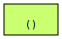

In [19]:
from torchviz import make_dot
make_dot(xx_t, show_attrs = True)

### Dataset and Dataloaders

In [24]:
from torch.utils.data import Dataset, DataLoader

In [33]:
height = np.random.normal(loc = 168, scale = 10, size=500).reshape(-1, 1)
weight = np.random.normal(loc = 60, scale = 10, size=500).reshape(-1, 1)

In [34]:
bmi = weight / (height/100)**2
labels = (bmi >= 25).astype(int) # obese = 1 else 0

In [35]:
X = np.concatenate([height/np.max(height), weight/np.max(weight)], axis = 1)
Y = np.copy(labels).reshape(-1,1)

In [37]:
X.shape, Y.shape

((500, 2), (500, 1))

In [93]:
class TrainDataset(Dataset):
  def __init__(self, x, y):
    super().__init__()
    self.x = x
    self.y = y
  def __len__(self):
    return self.x.shape[0]
  def __getitem__(self, idx):
    return self.x[idx], self.y[idx]

In [94]:
X = torch.tensor(X, dtype=torch.float)
Y = torch.tensor(Y, dtype=torch.float)
train_dataset = TrainDataset(X, Y)

<ipython-input-94-ab10a06d6e39>:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  X = torch.tensor(X, dtype=torch.float)
<ipython-input-94-ab10a06d6e39>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  Y = torch.tensor(Y, dtype=torch.float)


In [78]:
len(train_dataset)

500

In [95]:
train_dataloader = DataLoader(train_dataset, batch_size=350, shuffle=True)

In [80]:
for i, (x, y) in enumerate(train_dataloader):
  print(i, x.shape, y.shape)

0 torch.Size([350, 2]) torch.Size([350, 1])
1 torch.Size([150, 2]) torch.Size([150, 1])


### Model def'n

In [60]:
import torch.nn as nn

In [86]:
class VanillaModel(nn.Module):
  def __init__(self, input_dim, output_dim):
    super().__init__()
    self.linear = nn.Linear(input_dim, output_dim)

  def forward(self, x):
    return self.linear(x)

In [83]:
model = VanillaModel(X.shape[1], Y.shape[1])

In [85]:
X.shape

torch.Size([500, 2])

In [64]:
model

VanillaModel(
  (linear): Linear(in_features=2, out_features=1, bias=True)
)

### Model Training

In [98]:
for i in train_dataloader:
  print(i[0].shape, i[1].shape)
  break

torch.Size([350, 2]) torch.Size([350, 1])


In [134]:
def fit(model, dataloader, epochs, lr):
  for epoch in range(1, epochs+1):
    for batch in dataloader:

      # Forward
      y_pred = model(batch[0])

      # Loss
      loss = torch.mean((y_pred - batch[1])**2)
      loss = loss.requires_grad_()
      # Backprop.
      loss.backward()

      print("Loss: ", loss.data)

      # Update weights
      with torch.no_grad():
        model.linear.weight -= lr * model.linear.weight.grad
        model.linear.bias -= lr * model.linear.bias.grad

      model.linear.weight.grad.zero_()
      model.linear.bias.grad.zero_()
  return loss

In [135]:
loss = fit(model, train_dataloader, 10, 0.003)

Loss:  tensor(548.3)
Loss:  tensor(501.5526)
Loss:  tensor(487.9394)
Loss:  tensor(475.7312)
Loss:  tensor(462.6880)
Loss:  tensor(452.3632)
Loss:  tensor(440.1076)
Loss:  tensor(427.0464)
Loss:  tensor(417.0630)
Loss:  tensor(406.8067)
Loss:  tensor(396.0230)
Loss:  tensor(385.6359)
Loss:  tensor(375.5516)
Loss:  tensor(366.7445)
Loss:  tensor(356.8633)
Loss:  tensor(347.0611)
Loss:  tensor(338.5739)
Loss:  tensor(329.7146)
Loss:  tensor(321.5656)
Loss:  tensor(312.4372)


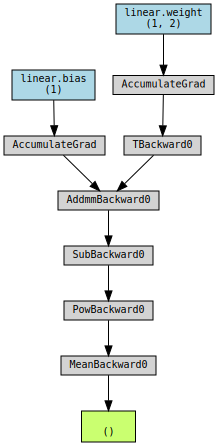

In [141]:
make_dot(loss, params=dict(model.named_parameters()))